In [477]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat

In [479]:
f1 = pd.read_csv("F1_results_2013-2023.csv")

In [481]:
f1

,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Fastest Lap,Year,+1 Pt,Set Fastest Lap
0,Australia,1,7,Kimi Raikkönen,Lotus Renault,7.0,58,1:30:03.225,25.0,1:29.274,2013,NaN,NaN
1,Australia,2,3,Fernando Alonso,Ferrari,5.0,58,+12.451,18.0,1:29.560,2013,NaN,NaN
2,Australia,3,1,Sebastian Vettel,Red Bull Racing Renault,1.0,58,+22.346,15.0,1:30.409,2013,NaN,NaN
3,Australia,4,4,Felipe Massa,Ferrari,4.0,58,+33.577,12.0,1:30.239,2013,NaN,NaN
4,Australia,5,10,Lewis Hamilton,Mercedes,3.0,58,+45.561,10.0,1:29.759,2013,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4558,Abu Dhabi,16,2,Logan Sargeant,Williams Mercedes,20.0,58,+87.791,0.0,1:28.580,2023,NaN,No
4559,Abu Dhabi,17,24,Guanyu Zhou,Alfa Romeo Ferrari,19.0,58,+89.422,0.0,1:28.746,2023,NaN,No
4560,Abu Dhabi,18,55,Carlos Sainz,Ferrari,16.0,57,DNF,0.0,1:29.452,2023,NaN,No
4561,Abu Dhabi,19,77,Valtteri Bottas,Alfa Romeo Ferrari,18.0,57,+1 lap,0.0,1:29.863,2023,NaN,No


# Data Cleaning
taking a look at how each column of the data set is formatted and if there is any missing/incorrect data

In [484]:
f1["Track"].unique()

array(['Australia', 'Malaysia', 'China', 'Bahrain', 'Spain', 'Monaco',
       'Canada', 'Great Britain', 'Germany', 'Hungary', 'Belgium',
       'Italy', 'Singapore', 'South Korea', 'Japan', 'India', 'Abu Dhabi',
       'United States', 'Brazil', 'Austria', 'Russia', 'Mexico', 'Europe',
       'Sinagpore', 'Azerbaijan', 'Great Brtiain', 'France', 'Styria',
       '70th Anniversary', 'Tuscany', 'Eifel', 'Portugal',
       'Emilia Romagna', 'Turkey', 'Sakhir', 'Netherlands', 'Qatar',
       'Saudi Arabia', 'Miami', 'Las Vegas'], dtype=object)

Data in "Track" column is stored as strings. There is a spelling error where Great Britain is spelled as Great Brtiain and of Singapore being spelled as Sinagpore. Their is an odd value (70th Anniversary) which does not match with the rest. All the other values are some form cities, countries, regions, etc. After doing some research this was race was held at Silverstone in the United Kingdom in commeration of the first Formula One Championship race held at Silverstone in 1950. To match with the other races at the same location, I am going to change the name to Great Britian (the races held at Silverstone are labeled as Great Britian) for this race as well. Interestingly this race was held 7 days after another race at Silverstone which is extremely unusual as normally a circut is only raced once a year.

In [488]:
f1["Track"] = f1["Track"].str.replace('70th Anniversary', 'Great Britain')
f1["Track"] = f1["Track"].str.replace('Great Brtiain', 'Great Britain')
f1["Track"] = f1["Track"].str.replace('Sinagpore', 'Singapore')

In [490]:
f1["Position"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', 'NC', '19', '20', '21', 'EX',
       '22', 'DQ'], dtype=object)

Data in "Position" column is stored as strings. Represents what position a driver finished in a race. All the values are numbers except for NC (Not Classified), DQ (Disqualified). There is also EX but this also represents a disqualification so it will be changed to DQ <br> <br>
NC (Not Classified) - Drivers need to be classified inorder to earn points which means completing at least 90% of the race distance. Usually causes for NC are crashes or mechanical failures that require retirement of the car. <br>
DQ (Disqualified) - When a driver has been disqualified, usually for a technical breach of their cars.

In [495]:
f1["Position"] = f1["Position"].str.replace("EX","DQ")

In [497]:
f1["No"].unique()

array([ 7,  3,  1,  4, 10,  2, 15, 14,  5,  8,  6, 18, 12, 17, 22, 20, 23,
       21, 19,  9, 16, 11, 77, 27, 25, 26, 99, 13, 44, 45, 46, 55, 33, 98,
       28, 53, 30, 94, 88, 47, 31, 36, 40, 39, 35, 63, 89, 51, 24, 81],
      dtype=int64)

Data in "No" column is stored as a integers. Represents drivers racing number that can be seen on the car. No odd or missing data.

In [500]:
f1["Driver"].unique()

array(['Kimi Raikkönen', 'Fernando Alonso', 'Sebastian Vettel',
       'Felipe Massa', 'Lewis Hamilton', 'Mark Webber', 'Adrian Sutil',
       'Paul di Resta', 'Jenson Button', 'Romain Grosjean',
       'Sergio Perez', 'Jean-Eric Vergne', 'Esteban Gutierrez',
       'Valtteri Bottas', 'Jules Bianchi', 'Charles Pic', 'Max Chilton',
       'Giedo van der Garde', 'Daniel Ricciardo', 'Nico Rosberg',
       'Pastor Maldonado', 'Nico Hulkenberg', 'Heikki Kovalainen',
       'Kevin Magnussen', 'Daniil Kvyat', 'Marcus Ericsson',
       'Kamui Kobayashi', 'Andre Lotterer', 'Will Stevens', 'Felipe Nasr',
       'Carlos Sainz', 'Max Verstappen', 'Roberto Merhi',
       'Alexander Rossi', 'Jolyon Palmer', 'Pascal Wehrlein',
       'Rio Haryanto', 'Stoffel Vandoorne', 'Esteban Ocon',
       'Antonio Giovinazzi', 'Lance Stroll', 'Daniil Kyvat',
       'Pierre Gasly', 'Brendon Hartley', 'Charles Leclerc',
       'Sergey Sirotkin', 'Lando Norris', 'Alexander Albon',
       'George Russell', 'Robert Ku

Data in the "Driver" column is stored as strings. Represents the drivers first and last name. Daniil Kvyat is incorrectly spelled Daniil Kyvat one time which will be replaced.

In [503]:
f1["Driver"] = f1["Driver"].str.replace("Daniil Kyvat", "Daniil Kvyat")

In [505]:
f1["Team"].unique()

array(['Lotus Renault', 'Ferrari', 'Red Bull Racing Renault', 'Mercedes',
       'Force India Mercedes', 'McLaren Mercedes', 'STR Ferrari',
       'Sauber Ferrari', 'Williams Renault', 'Marussia Cosworth',
       'Caterham Renault', 'Lotus Ferrari', 'Williams Mercedes',
       'STR Renault', 'Marussia Ferrari', 'Red Bull Racing Ferrari',
       'McLaren Honda', 'Lotus Mercedes', 'Williams Meredes',
       ' Williams Mercedes', 'Red Bull Racing Tag Heuer', 'Haas Ferrari',
       'Toro Rosso Ferrari', 'Renault', 'MRT Mercedes', 'Toro Rosso',
       'McLaren Renault', 'Scuderia Toro Rosso Honda',
       'Red Bull Racing Honda', 'Alfa Romeo Racing Ferrari',
       'Racing Point BWT Mercedes', 'AlphaTauri Honda',
       'Aston Martin Mercedes', 'Alpine Renault', 'Alfa Romeo Ferrari',
       'AlphaTauri RBPT', 'Aston Martin Aramco Mercedes',
       'Red Bull Racing RBPT', 'Red Bull Racing Honda RBPT',
       'AlphaTauri Honda RBPT'], dtype=object)

Data in the "Team" column is stored as strings. Represents the team that a driver drives for. Most entries are listen as the team and then their engine provider or a sponser for the year. For example "McLaren Mercedes", is the team McLaren using a Mercedes built engine and Red Bull Racing Tag Heuer is the team Red Bull Racing with their sponser Tag Heuer. To better track teams throughout the years where they may swap sponsers and engines, those will be removed off the ends of names. For ledgibility and some small name changes "Racing" will also be removed off the end of team names such as Red Bull Racing and Alfa Romeo Racing.

In [509]:
f1["Team"] = f1["Team"].str.replace(" Renault", "")
f1["Team"] = f1["Team"].str.replace(" Ferrari", "")
f1["Team"] = f1["Team"].str.replace(" Mercedes", "")
f1["Team"] = f1["Team"].str.replace(" RBPT", "")
f1["Team"] = f1["Team"].str.replace(" Cosworth", "")
f1["Team"] = f1["Team"].str.replace(" Honda", "")
f1["Team"] = f1["Team"].str.replace(" Tag Heuer", "")
f1["Team"] = f1["Team"].str.replace(" Aramco", "")
f1["Team"] = f1["Team"].str.replace(" Meredes", "")
f1["Team"] = f1["Team"].str.replace("Scuderia ", "")
f1["Team"] = f1["Team"].str.replace(" Racing", "")
f1["Team"] = f1["Team"].str.replace(" Williams", "Williams")

In [511]:
f1["Team"].unique()

array(['Lotus', 'Ferrari', 'Red Bull', 'Mercedes', 'Force India',
       'McLaren', 'STR', 'Sauber', 'Williams', 'Marussia', 'Caterham',
       'Haas', 'Toro Rosso', 'Renault', 'MRT', 'Alfa Romeo',
       'Racing Point BWT', 'AlphaTauri', 'Aston Martin', 'Alpine'],
      dtype=object)

In [513]:
f1["Starting Grid"].unique()

array([ 7.,  5.,  1.,  4.,  3.,  2., 12.,  9., 10.,  8., 15., 13., 18.,
       16., 19., 22., 20., 21., 14.,  6., 17., 11., nan])

Data in the "Starting Grid" column is stored as integers. Represents the starting order for a race. There is one instance in which someones starting position is not recorded (Yuki Tsunoda in the 2021 British GP). After doing some reasearch this appears to just be a missing value so it will be filled in with his starting position (16th).

In [516]:
f1["Starting Grid"] = f1["Starting Grid"].fillna(16)

In [518]:
f1["Laps"].unique()

array([58, 57, 56, 39, 26, 24,  0, 55, 54, 53, 51, 45, 27, 22,  1, 21, 15,
        5,  4, 16, 66, 65, 64, 52,  8, 78, 72, 63, 61, 44, 28,  7, 70, 69,
       68, 67, 43, 46, 41, 35, 60, 59,  3, 42, 19, 25, 14, 37, 23, 50, 36,
       71,  2, 49, 29, 32, 18, 40, 33, 17, 34, 77, 75, 10, 47, 11,  9, 38,
       13, 62, 76, 31, 30, 12,  6, 20, 74, 48, 87], dtype=int64)

Data in "Laps" is stored as integers. Represents number of laps a driver completed for a race. Sometimes less than the laps in the race due to DNF's. No missing/incorrect data

In [389]:
f1["Time/Retired"].unique()

array(['1:30:03.225', '+12.451', '+22.346', ..., '+83.696', '+87.791',
       '+89.422'], dtype=object)

Data in "Time/Retired" is stored as strings. Represents either total time to finish the race, number of seconds behind the leader or how many laps behind the leader a driver finished. If the driver did not finish the race it records how either did not start(DNS) or did not finish (DNF) No missing/incorrect data

In [522]:
f1["Points"].unique()

array([25. , 18. , 15. , 12. , 10. ,  8. ,  6. ,  4. ,  2. ,  1. ,  0. ,
       50. , 36. , 30. , 24. , 20. , 16. , 26. ,  9. , 11. , 13. , 19. ,
        3. ,  7. ,  5. , 12.5,  7.5,  0.5])

Data in "Points" stored as integers. Represents how many points a driver got after a race. No missing or incorrect data but there are some interesting values such as 50 which is from the one race in 2014 where double points were awarded. There was also one race where reduced points were awarded because the race was stopped partway through due to poor weather.

In [525]:
f1["Fastest Lap"].unique()

array(['1:29.274', '1:29.560', '1:30.409', ..., '1:29.452', '1:29.863',
       '1:29.934'], dtype=object)

Data in the "Fastes Lap" column is stored as strings. Represents the fastest time it took for a driver to complete a lap. If a driver did not finish a lap in the race, the entry is left blank. No missing or incomplete data

In [528]:
f1["Year"].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype=int64)

Data in "Year" column stored as integers. Represents the year in which a race was held. No missing or incomplete data

In [401]:
f1["+1 Pt"].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [403]:
f1["Set Fastest Lap"].unique()

array([nan, 'No', 'Yes'], dtype=object)

Data in both "+1 Pt" and "Set Fastest Lap" are stored as strings. Both Represent the same thing, wheter a driver recorded the fastest lap of the race. +1 Pt records it for 2022 and 2021 while Set Fastest Lap records is for 2023. Since this was only recorded for a few years and has missing data, I probably will not be using it.

# Visualization

### Points

Drivers are awarded points based on how they finish in a race. Points are only awarded to those who finish in the top 10 (There are usually 20-22 drivers per race). Each of the top 10 spots awards a different amount of points as listed below

In [534]:
scoring = pd.DataFrame({"Position": ["1st","2nd","3rd","4th","5th","6th","7th","8th","9th","10th"], "Points Awarded": [25,18,15,12,10,8,6,4,2,1]})
scoring

,Position,Points Awarded
0,1st,25
1,2nd,18
2,3rd,15
3,4th,12
4,5th,10
5,6th,8
6,7th,6
7,8th,4
8,9th,2
9,10th,1


The top 5 positons make up about 80% of the points available each race. To get a better idea of how evenly drivers finish positons are distributed all the drivers will be grouped into quartiles based on how many total points they have scored.

Quartile 1 has scored 0.01% of points
Quartile 2 has scored 0.83% of points
Quartile 3 has scored 11.71% of points
Quartile 4 has scored 87.45% of points


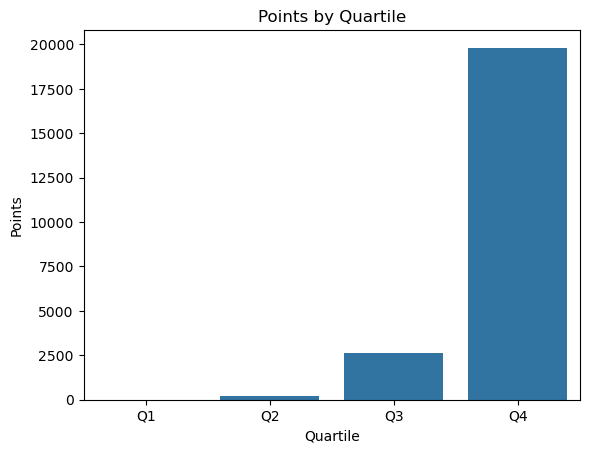

In [538]:
points = f1[["Driver", "Points"]]
pointsgroup = points.groupby("Driver").sum().sort_values(by = "Points", ascending = False).reset_index()
pointsgroup['Quarter'] = pd.qcut(pointsgroup["Points"], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
pointsquarter = pointsgroup[["Points", "Quarter"]].copy()
pointsquarter = pointsquarter.groupby("Quarter",observed=False).sum().reset_index()
sns.barplot(data = pointsquarter, x = "Quarter", y = "Points")
plt.title("Points by Quartile")
plt.xlabel("Quartile")
plt.ylabel("Points")
percents = pointsquarter["Points"]/sum(pointsquarter["Points"]) * 100
print(f"Quartile 1 has scored {round(percents[0],2)}% of points")
print(f"Quartile 2 has scored {round(percents[1],2)}% of points")
print(f"Quartile 3 has scored {round(percents[2],2)}% of points")
print(f"Quartile 4 has scored {round(percents[3],2)}% of points")

The top 25% of points scorers have 87.4% of the points that have been scored between 2013 and 2023. The next 25% scored just under 12% of points and the bottom 50% have scored under 1% of points. This implies that there is not a lot of variation in how drivers finish, a driver is likely to finish in similar positions each time they race. Within the top 25% of drivers, how are the points distributed?

Text(0.5, 1.0, 'Top 15 Drivers by Points')

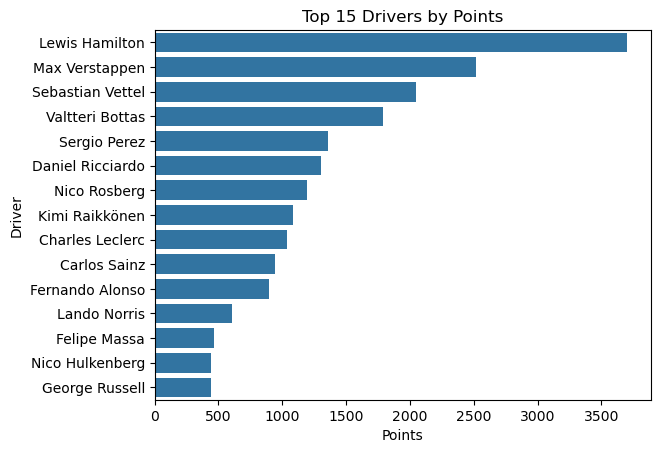

In [541]:
top15 = pointsgroup.head(15)
sns.barplot(data = top15, x = "Points",  y = "Driver")
plt.title("Top 15 Drivers by Points")

Even within the top 25% of drivers the points are still skewed towards the top 5 point scorers. It appears that F1 is a feast or famine sport. Is this the same with teams? 

Text(0.5, 1.0, 'Teams by Points')

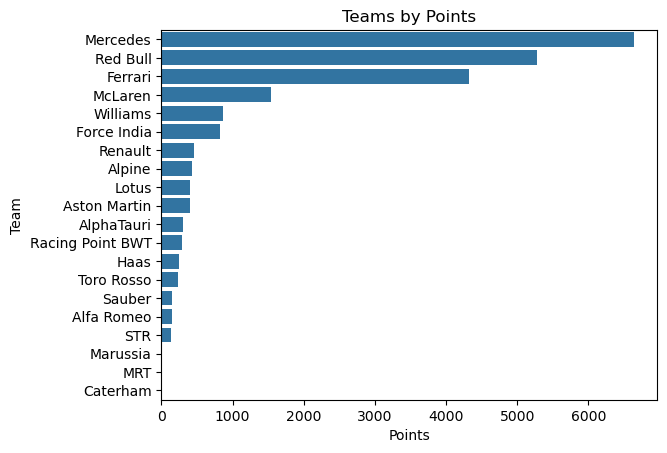

In [544]:
teams = f1[["Team", "Points"]]
teamsgroup = teams.groupby("Team").sum().sort_values(by = "Points", ascending = False).reset_index()
sns.barplot(data = teamsgroup, x = "Points",  y = "Team")
plt.title("Teams by Points")

Yes, the distributions of points is also very skewed towards the top teams as well. Although it might not be very compeitive between the best and worst teams, perhaps among the top teams it is competitve.

Text(0.5, 1.0, 'Points Scored per Year by Team')

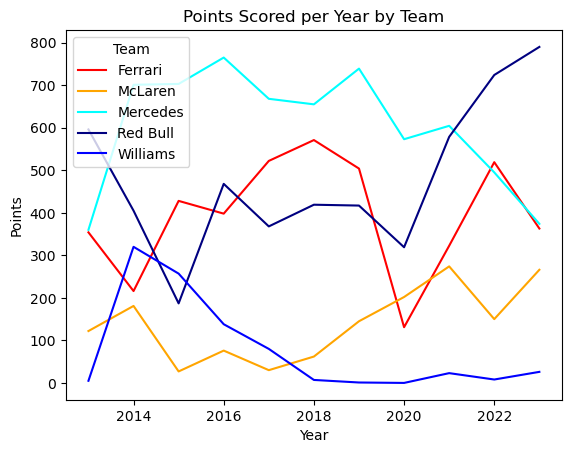

In [547]:
cons = f1[(f1["Position"] != "NC") & (f1["Position"] != "DQ")].copy()
conss = cons[["Team", "Points", "Year"]]
consgroup = conss.groupby(["Year","Team"]).sum().reset_index()
consgrouptop5 = consgroup[(consgroup["Team"] == "Mercedes") | (consgroup["Team"] == "Red Bull") | (consgroup["Team"] == "Ferrari")|(consgroup["Team"] == "McLaren")|(consgroup["Team"] == "Williams")]
custom_palette = {'Ferrari': 'red', 'Mercedes': 'cyan', 'McLaren': 'orange', 'Red Bull': 'navy', 'Williams': 'blue'}
sns.lineplot(data = consgrouptop5, x = "Year", y = "Points", hue = "Team",palette = custom_palette)
plt.title("Points Scored per Year by Team")

It seems like the top team will hold its spot for awhile before swapping to a new team but the teams right below seem to be more competive with each other. It is a little difficult to see how the teams have done over the years so showing their cumulative points since 2013 will give a better idea of how each team has done overall in the past 10 years.

Text(0.5, 1.0, 'Cumulative Points by Team')

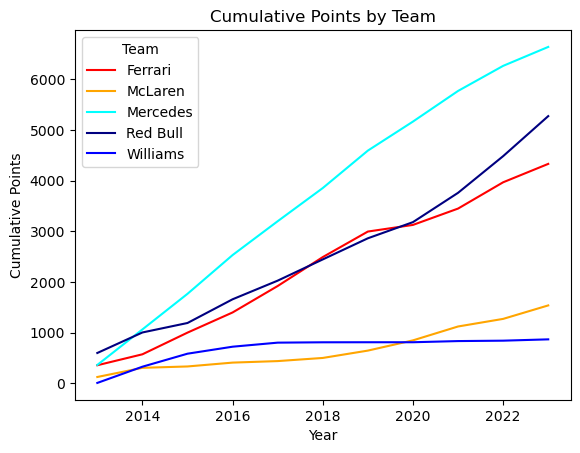

In [550]:
consgroup2 = consgroup.sort_values(by = ["Team","Year"])
consgroup2['Cumulative Points'] = consgroup2.groupby('Team')['Points'].cumsum()
consgroup2top5 = consgroup2[(consgroup2["Team"] == "Mercedes") | (consgroup2["Team"] == "Red Bull") | (consgroup2["Team"] == "Ferrari")|(consgroup2["Team"] == "McLaren")|(consgroup2["Team"] == "Williams")]
sns.lineplot(data = consgroup2top5, x = "Year", y = "Cumulative Points", hue = "Team", palette = custom_palette)
plt.title("Cumulative Points by Team")

Mercedes has been the dominant team for the majority of the past 10 years with Red Bull and Ferrari being competitive for the second spot until recently where Red Bull has improved signifigantly. Williams has plateaued and stopped scoring consitently while McLaren has slowly been improving.

### DNF's

Drivers are not always able to finish a race. Sometimes they crash or there is a mechinal problem with their car and they are forced to stop. Each track that drivers race at is different and can either be more difficult to drive or more difficult on the car. How different are the rates of DNF's (Did not Finish) different based on track?

Text(0.5, 0, 'Percentage of Drivers That DNF')

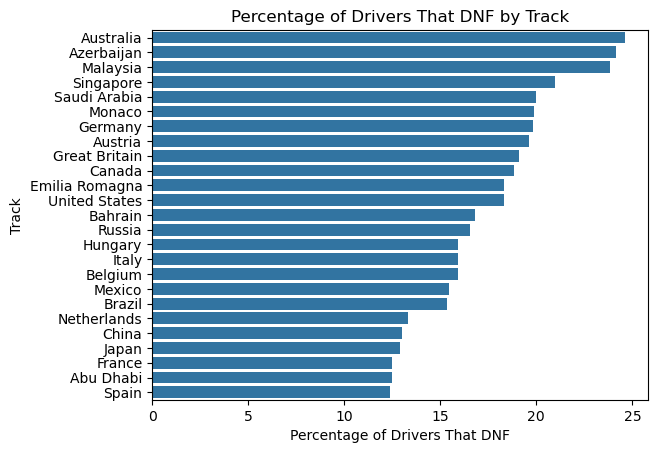

In [555]:
dnf = f1[f1["Time/Retired"] == "DNF"]
dnftrack = dnf[["Track", "Time/Retired"]]
dnftrackgroup = dnftrack.groupby("Track").count().reset_index()
trackcount = f1[["Track", "Driver"]]
trackcount = trackcount.groupby("Track").count().reset_index()
merged = pd.merge(dnftrackgroup, trackcount, on='Track', how='left')
merged["Proportion"] = merged["Time/Retired"]/merged["Driver"]
merged = merged.sort_values(by = "Proportion", ascending = False)
mergedless = merged[merged["Driver"] > 45].copy()
mergedless["Proportion"] = mergedless["Proportion"] * 100
sns.barplot(data = mergedless, x = "Proportion", y = "Track")
plt.title("Percentage of Drivers That DNF by Track")
plt.xlabel("Percentage of Drivers That DNF")

Above is a graph of the percent of drivers that DNF at tracks that have been raced at 3 or more times. There is about a 10% differece between the track where the most DNF's happen (Australia) and the least DNF's happen (Spain). Some tracks do not have a lot of runoff areas, meaning that mistakes that cause a driver to go off track are a lot more likley to end up in a wall instead of some grass.The Singapore GP is an example of a race that both is held in an extremely hot location (causing potential overheating problems) and is not forgiving to mistakes that cause a driver to leave the track.

### Positions Gained

Which drivers have gained the most positions on average during a race?

Text(0.5, 0, 'Postions Gained')

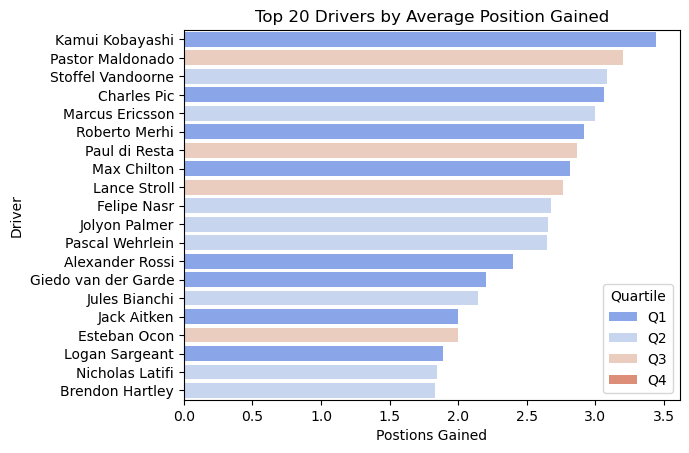

In [561]:
racing = f1[(f1["Position"] != "NC") & (f1["Position"] != "DQ")].copy()
racing["Position"] = racing["Position"].astype(int)
racing = racing[["Driver", "Starting Grid", "Position"]]
racing["Diff"] = racing["Starting Grid"] - racing["Position"]
racinggroup = racing.groupby("Driver").mean().reset_index()
placesgained = racinggroup.sort_values(by = "Diff", ascending = False)
merges = pd.merge(placesgained, pointsgroup, on='Driver', how='left')
mergess = merges.head(20)
sns.barplot(data = mergess, x = "Diff", y = "Driver",hue = "Quarter",palette='coolwarm')
plt.legend(title='Quartile')
plt.title("Top 20 Drivers by Average Position Gained")
plt.xlabel("Postions Gained")

Above is a graph of the average positions gained/loss by the drivers with the most positions gained on average. DNF's are removed because they may be caused by things that the driver cant control such as another driver crashing into them or a mechanical failure. Kamui Kobayashi and Pastor Maldonado are the drivers who on average have gained the most positions in a race. Interestingly none of the top 20 drivers by positioned gained are in the top 25th percentile of drivers who score points. What about the drivers who lose the most positions in a race?

Text(0.5, 0, 'Postions Gained')

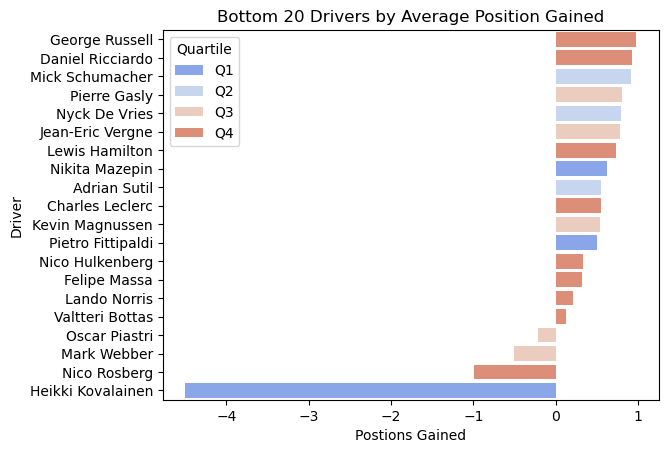

In [564]:
bot20= merges.tail(20)
sns.barplot(data = bot20, x = "Diff", y = "Driver",hue = "Quarter",palette='coolwarm')
plt.legend(title='Quartile')
plt.title("Bottom 20 Drivers by Average Position Gained")
plt.xlabel("Postions Gained")

There are a lot more drivers in the top 25th percentile of points in the bottom 20 of average positions. The top quartile of drivers by points do not gain as many positons as the other quartiles. This is likely because of how DNF's affect positions gained. A driver who DNF's will give all the drivers behind them a position gain but not the drivers in front. A driver who scores a lot of points has less people in front of them and is less likely to gain positions by a DNF. How does number of positions gained change with starting position?

In [567]:
diff = f1[(f1["Position"] != "NC") & (f1["Position"] != "DQ")].copy()
diff["Position"] = diff["Position"].astype(int)
diff["Diff"] = diff["Starting Grid"] - diff["Position"]
diff = diff[["Starting Grid", "Position", "Diff"]]
diffgroup = diff.groupby("Starting Grid").mean().reset_index()

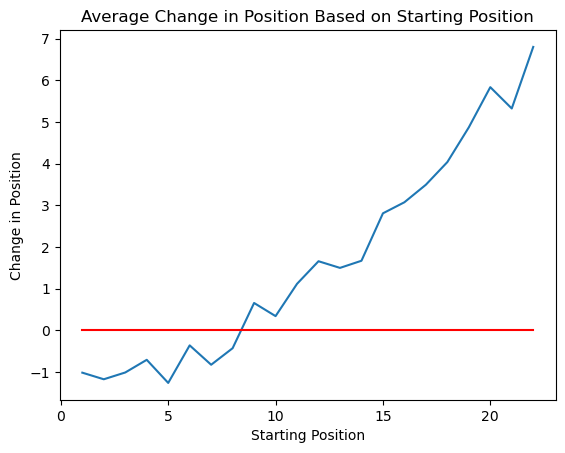

In [569]:
sns.lineplot(data = diff, x = "Starting Grid", y = "Diff", errorbar =None)
plt.title("Average Change in Position Based on Starting Position")
plt.xlabel("Starting Position")
plt.ylabel("Change in Position")
x = np.linspace(1, 22, 100)
y = 0 * x
plt.plot(x, y, color = "r")

Drivers who start further back gain more positions on average then drivers who start further ahead. As mentioned earlier this is likely because of how DNF's will give drivers in the back positions gained more often than those infront. There are also less positions to lose while starting in the back. For example a driver who starts in 2nd can only gain at most 1 position while a driver starting in 9th can gain 8.

# Prediction

How well can someones finish position be predicted be given their starting spot and the average position gained/loss from that starting position?

In [431]:
avg_changes = diffgroup[['Starting Grid', "Diff"]]
avg_changes.columns = ['Starting Grid', 'Avg Change']
diffmain = diff.merge(avg_changes, on='Starting Grid', how='left')
avg_changes
diffmain

,Starting Grid,Position,Diff,Avg Change
0,7.0,1,6.0,-0.829146
1,5.0,2,3.0,-1.265625
2,1.0,3,-2.0,-1.019417
3,4.0,4,0.0,-0.710660
4,3.0,5,-2.0,-1.014851
...,...,...,...,...
3846,20.0,16,4.0,5.837989
3847,19.0,17,2.0,4.872928
3848,16.0,18,-2.0,3.073446
3849,18.0,19,-1.0,4.038462


In [432]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [435]:
X = diffmain[["Starting Grid", "Avg Change"]]
Y = diffmain["Position"]
X_train, X_holdout, Y_train, Y_holdout = train_test_split(X,Y,test_size = .10)

Splitting the data into a training and a test set for a linear model

In [440]:
lr = LinearRegression()
model = lr.fit(X_train, Y_train)
Y_pred = model.predict(X_holdout)

Fitting based on training data, and predicting test data

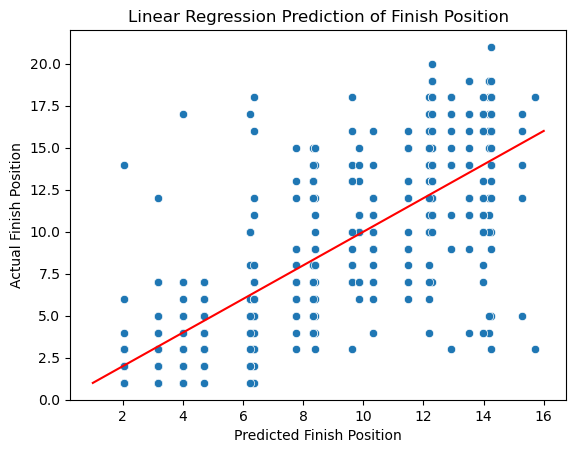

In [442]:
y_pred = model.predict(X_train)
sns.scatterplot(x = Y_pred, y = Y_holdout)
plt.xlabel("Predicted Finish Position")
plt.ylabel("Actual Finish Position")
plt.title("Linear Regression Prediction of Finish Position")
x = np.linspace(1, 16, 100)
y = 1 * x
plt.plot(x, y, color = "r")

The closer a dot is to the red line the better job the model did at predicting the finish position. There are a lot of dots that are not close to the redline meaning that this model is not doing a great job of predicting the finish position of a driver.

In [444]:
def rmse(actual_y, predicted_y):
    return np.sqrt(np.mean((actual_y-predicted_y)**2))

y_pred = model.predict(X_train)

train_error = rmse(y_pred, Y_train)
holdout_error = rmse(Y_holdout, Y_pred)

print("Training RMSE:", train_error)
print("Holdout RMSE:", holdout_error)

Training RMSE: 3.3851100340933824
Holdout RMSE: 3.5988359274522215


The RMSE summarizes the the difference between predicted and actual values for the linear model. If the training and holdout RMSE are similar it means that the model is not overfit and will predict new values with similar accuracy as data used to train the model. This models RMSE is similar in training and holdout meaning it is not overfit but is not very accurate as the RMSE is quite high (the model is off by an average of 3 positions). Overall it is a poor model at predicting how a driver will finish.